# plot time series DoY 

In [9]:
an_EE_TS_all.reset_index(drop=True, inplace=True)
an_EE_TS = an_EE_TS_all[an_EE_TS_all.ID == an_EE_TS_all.ID[0]]
an_EE_TS.reset_index(drop=True, inplace=True)
an_EE_TS.shape

(62, 27)

(50, 28)

In [10]:
polygon_list = an_EE_TS['ID'].unique()

print("there are [{pol_count}] in the data frame.".format(pol_count = str(len(polygon_list))))
print ("image years are " + str(an_EE_TS.image_year.unique()))

there are [1] in the data frame.
image years are [2016 2017 2018]


In [11]:
an_EE_TS = an_EE_TS[an_EE_TS.image_year.isin([2016, 2017])]
print ("image years are " + str(an_EE_TS.image_year.unique()))

image years are [2016 2017]


In [13]:
an_EE_TS = rc.add_human_start_time(an_EE_TS)
an_EE_TS.head(2)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,SF_year,CovrCrp,human_system_start_time
0,113035_WSDA_SF_2017,5.0,0.019722,Grant,Other,fallow,wsda,275.0,0.213343,4.697693,...,Timothy,19010.890707,622.089116,1.475434e+09,T15R24E32,2016,0.273118,2017,NA,2016-10-02
1,113035_WSDA_SF_2017,5.0,0.012637,Grant,Other,fallow,wsda,295.0,0.233983,4.697693,...,Timothy,19010.890707,622.089116,1.477162e+09,T15R24E32,2016,0.195637,2017,NA,2016-10-22


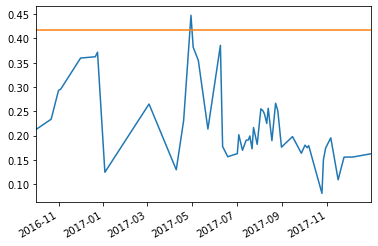

In [24]:
ts = pd.Series(an_EE_TS[indeks].values, index = an_EE_TS.human_system_start_time.values)
ts_1 = pd.Series(an_EE_TS[indeks].values, index = pd.to_datetime(an_EE_TS.human_system_start_time.values))
ts_1.plot();

ts_2 = pd.Series(an_EE_TS["Acres"].values/12, index = pd.to_datetime(an_EE_TS.human_system_start_time.values))
ts_2.plot();

Text(0.5, 1.0, 'D')

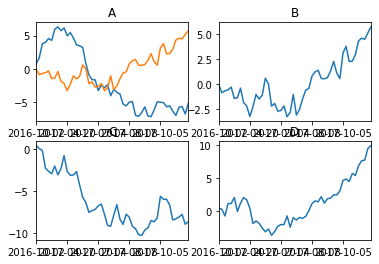

In [22]:
df = pd.DataFrame(np.random.randn(50, 4), index = ts.index, columns=list('ABCD'))
df = df.cumsum()

fig, axes = plt.subplots(nrows=2, ncols=2)

df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A')
df['B'].plot(ax=axes[0,0]);

df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B')

df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C')
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D')

In [ ]:
with pd.plot_params.use('x_compat', True):
    df.A.plot(color='r')
    df.B.plot(color='g')
    df.C.plot(color='b')

In [ ]:
# datetime.timestamp(an_EE_TS.Date.values[0])
pd.to_datetime(an_EE_TS.Date.values)

In [ ]:
ts = pd.Series(np.random.randn(1000), index = pd.date_range('1/1/2000', periods=1000))
ts.head(2)

In [ ]:
type(ts.index[0])

In [ ]:
fig = go.Figure([go.Scatter(x = an_EE_TS['human_system_start_time'], 
                            y = an_EE_TS['EVI'])
                ])

fig.show()

fig.write_image("/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/fig1.png")

In [ ]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x = an_EE_TS['human_system_start_time'], 
                            y = an_EE_TS['EVI']),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x = an_EE_TS['human_system_start_time'], 
                            y = an_EE_TS['Acres']/10),
    secondary_y=False,
)

fig.show()
fig.write_image("/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/fig2.png")

In [ ]:
an_EE_TS.plot(an_EE_TS["human_system_start_time"], an_EE_TS["EVI"], style='k.')
pyplot.show()

In [ ]:
an_EE_TS.plot()
pyplot.show()

In [ ]:
print (an_EE_TS.system_start_time.iloc[0])
print ("___________________________________________")
print (time.strftime('%Y-%m-%d', time.localtime(an_EE_TS.system_start_time.iloc[0])))
print ("___________________________________________")

print ("Convert Epoch to datetime format")
print (datetime.datetime.fromtimestamp(an_EE_TS.system_start_time.iloc[0]))


# Convert Epoch to DoY
print ("___________________________________________")
print ("")
print ("Convert Epoch to DoY")
print ( (datetime.datetime.fromtimestamp(an_EE_TS.system_start_time.iloc[0])).timetuple().tm_yday  )

print ("___________________________________________")
print ("")
print ("difference number of days")
print ((date(2003,11,22) - date(2002,10,20)).days)

In [ ]:
time.localtime(a_df_1.system_start_time.iloc[0])

In [ ]:
# datetime.datetime(2016, 1, 1) + datetime.timedelta(275 - 1)
# im_yr_sotred = a_df_1.copy()
# epoch_sorted = a_df_1.copy()
# im_yr_sotred.sort_values(by=['image_year', 'doy'], inplace=True)
# epoch_sorted.sort_values(by=['system_start_time'], inplace=True)
# epoch_sorted.to_csv (r'/Users/hn/Desktop/test/epoch_sorted.csv', index = True, header=True)
# im_yr_sotred.to_csv (r'/Users/hn/Desktop/test/im_yr_sotred.csv', index = True, header=True)
# a_df_1.to_csv (r'/Users/hn/Desktop/test/a_df_1.csv', index = True, header=True)